# Exercise:
Get information from webpage with beautiful soup.

- https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- https://www.geeksforgeeks.org/python-web-scraping-tutorial/?ref=lbp
- Get the links with python job posts from this page: https://realpython.github.io/fake-jobs/
- Visualize all job types and/or other available info in the page.
- (Optinal) Get another info from website you've chosen, If you have more time for this study.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
url = "https://realpython.github.io/fake-jobs/"
page = requests.get(url)

In [5]:
soup = BeautifulSoup(page.content, "html.parser")
# added .content to avoid problems with character encoding.

In [7]:
job_cards = soup.find_all("div", class_="card-content")
print(f"{len(job_cards)} adet iş ilanı bulundu.")


100 adet iş ilanı bulundu.


In [21]:
python_jobs = []


for job in job_cards:
    title = job.find("h2", class_="title").text.strip()

    if "python" in title.lower():
        company = job.find("h3", class_="company").text.strip()
        location = job.find("p", class_="location").text.strip()
        link = job.find_all("a")[-1]["href"]

        python_jobs.append({
            "Title": title,
            "Company": company,
            "Location": location,
            "Link": link
        })

In [23]:
df = pd.DataFrame(python_jobs)
df.head()

,Title,Company,Location,Link
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",https://realpython.github.io/fake-jobs/jobs/se...
1,Software Engineer (Python),Garcia PLC,"Ericberg, AE",https://realpython.github.io/fake-jobs/jobs/so...
2,Python Programmer (Entry-Level),"Moss, Duncan and Allen","Port Sara, AE",https://realpython.github.io/fake-jobs/jobs/py...
3,Python Programmer (Entry-Level),Cooper and Sons,"West Victor, AE",https://realpython.github.io/fake-jobs/jobs/py...
4,Software Developer (Python),Adams-Brewer,"Brockburgh, AE",https://realpython.github.io/fake-jobs/jobs/so...


In [29]:
python_jobs = []


for job in job_cards:
    title = job.find("h2", class_="title").text.strip()

    if "python" in title.lower():
        company = job.find("h3", class_="company").text.strip()
        location = job.find("p", class_="location").text.strip()
        

        python_jobs.append({
            "Title": title,
            "Company": company,
            "Location": location,
            
        })

In [36]:
df = pd.DataFrame(python_jobs)
df.index = range(1, len(df) + 1)
df.head()

,Title,Company,Location
1,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA"
2,Software Engineer (Python),Garcia PLC,"Ericberg, AE"
3,Python Programmer (Entry-Level),"Moss, Duncan and Allen","Port Sara, AE"
4,Python Programmer (Entry-Level),Cooper and Sons,"West Victor, AE"
5,Software Developer (Python),Adams-Brewer,"Brockburgh, AE"


In [ ]:
pyton2_jobs = df[df["Title"].str.contains("python", case=False)]
pyton2_jobs

,Title,Company,Location
1,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA"
2,Software Engineer (Python),Garcia PLC,"Ericberg, AE"
3,Python Programmer (Entry-Level),"Moss, Duncan and Allen","Port Sara, AE"
4,Python Programmer (Entry-Level),Cooper and Sons,"West Victor, AE"
5,Software Developer (Python),Adams-Brewer,"Brockburgh, AE"
6,Python Developer,Rivera and Sons,"East Michaelfort, AA"
7,"Back-End Web Developer (Python, Django)",Stewart-Alexander,"South Kimberly, AA"
8,"Back-End Web Developer (Python, Django)","Jackson, Ali and Mckee","New Elizabethside, AA"
9,Python Programmer (Entry-Level),Mathews Inc,"Robertborough, AP"
10,Software Developer (Python),Moreno-Rodriguez,"Martinezburgh, AE"


In [42]:
top_10_locations = df["Location"].value_counts().head(10)
top_10_locations


Location
Stewartbury, AA          1
Ericberg, AE             1
Port Sara, AE            1
West Victor, AE          1
Brockburgh, AE           1
East Michaelfort, AA     1
South Kimberly, AA       1
New Elizabethside, AA    1
Robertborough, AP        1
Martinezburgh, AE        1
Name: count, dtype: int64

In [44]:
top_10_locations = df["Title"].value_counts().head(10)
print(top_10_locations)

Title
Python Programmer (Entry-Level)            3
Software Developer (Python)                2
Back-End Web Developer (Python, Django)    2
Senior Python Developer                    1
Software Engineer (Python)                 1
Python Developer                           1
Name: count, dtype: int64


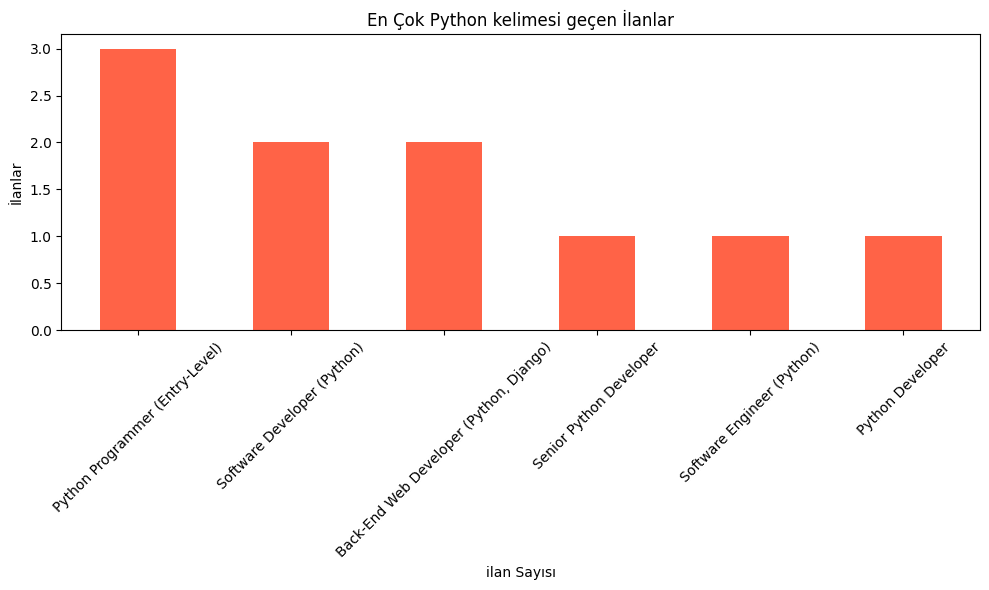

In [59]:
plt.figure(figsize=(10,6))
top_10_locations.plot(kind="bar", color="tomato")
plt.title("En Çok Python kelimesi geçen İlanlar")
plt.ylabel("İlanlar")
plt.xlabel("ilan Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()